# Data frames manipulation with pandas

[pandas](https://pandas.pydata.org/) -  fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

----------------


In [1]:
## Load libraries
import pandas as pd
import matplotlib.pyplot as plt

## 1. Load & plot confounds variables 

**Confounds** (or *nuisance regressors*) are variables representing fluctuations with a potential non-neuronal origin. 

Confounding variables calculated by [fMRIPrep](https://fmriprep.readthedocs.io/en/stable/outputs.html#confounds) are stored separately for each subject, session and run in TSV files - one column for each confound variable. 

In [2]:
# Load data

confounds_path = "data/sub-01_ses-1_task-rest_bold_confounds.tsv"
confounds = pd.read_csv(confounds_path, delimiter="\t")

# Print first 5 rows of data
confounds.head()

,CSF,WhiteMatter,GlobalSignal,stdDVARS,non-stdDVARS,vx-wisestdDVARS,FramewiseDisplacement,tCompCor00,tCompCor01,tCompCor02,...,AROMAAggrComp29,AROMAAggrComp35,AROMAAggrComp36,AROMAAggrComp42,AROMAAggrComp45,AROMAAggrComp46,AROMAAggrComp50,AROMAAggrComp51,AROMAAggrComp53,AROMAAggrComp54
0,4715.346067,4909.426273,4862.612041,NaN,NaN,NaN,NaN,-0.059217,0.062892,-0.013710,...,1.062466,-1.569555,1.346532,-1.293528,-0.519630,-0.242345,-0.885939,-0.933226,0.079566,-0.261299
1,4717.920970,4900.866223,4853.728164,0.943263,15.010096,0.864449,0.079526,0.006799,0.039018,-0.022991,...,-0.289283,-0.822666,1.080866,0.765488,-1.162383,0.196090,-0.770284,-0.441885,-0.098900,0.525687
2,4725.817590,4907.646585,4860.376132,1.103134,17.554121,0.925185,0.090839,0.052704,-0.009987,0.123641,...,-0.841782,-1.616199,0.853288,-1.369633,-0.219267,-0.840327,0.293680,-1.459476,-2.189689,-0.283386
3,4716.867299,4907.365030,4852.321888,1.123165,17.872868,0.929857,0.088307,0.021223,-0.018306,0.113884,...,0.644177,-1.817780,1.318560,0.058877,-2.458908,-1.961658,-1.967909,-2.838033,0.913620,1.216556
4,4696.405244,4906.668756,4846.569808,1.056746,16.815956,0.946065,0.093996,-0.098909,0.000380,-0.024023,...,0.393395,-0.643666,0.644899,0.273928,0.031010,-0.709323,-0.322162,-0.922096,0.527810,0.738223


In [4]:
# Print column names

print(confounds.columns)

Index(['CSF', 'WhiteMatter', 'GlobalSignal', 'stdDVARS', 'non-stdDVARS',
       'vx-wisestdDVARS', 'FramewiseDisplacement', 'tCompCor00', 'tCompCor01',
       'tCompCor02', 'tCompCor03', 'tCompCor04', 'tCompCor05', 'aCompCor00',
       'aCompCor01', 'aCompCor02', 'aCompCor03', 'aCompCor04', 'aCompCor05',
       'Cosine00', 'Cosine01', 'Cosine02', 'Cosine03', 'Cosine04', 'Cosine05',
       'Cosine06', 'Cosine07', 'X', 'Y', 'Z', 'RotX', 'RotY', 'RotZ',
       'AROMAAggrComp03', 'AROMAAggrComp10', 'AROMAAggrComp12',
       'AROMAAggrComp14', 'AROMAAggrComp19', 'AROMAAggrComp20',
       'AROMAAggrComp25', 'AROMAAggrComp29', 'AROMAAggrComp35',
       'AROMAAggrComp36', 'AROMAAggrComp42', 'AROMAAggrComp45',
       'AROMAAggrComp46', 'AROMAAggrComp50', 'AROMAAggrComp51',
       'AROMAAggrComp53', 'AROMAAggrComp54'],
      dtype='object')


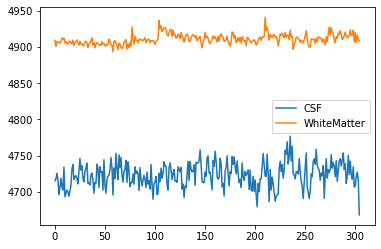

In [5]:
# Plot mean timeseries from cerebrospinal fluid (CSF) and white matter 

plt.plot(confounds["CSF"])
plt.plot(confounds["WhiteMatter"])
plt.legend(["CSF", "WhiteMatter"])

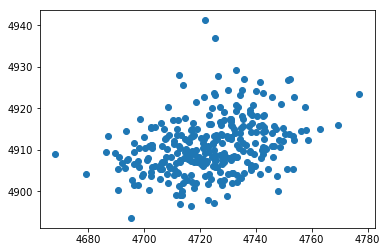

In [10]:
# Plot cerebrospinal fluid (CSF) and white matter timeseries on a scatterplot

plt.scatter(confounds["CSF"], confounds["WhiteMatter"])

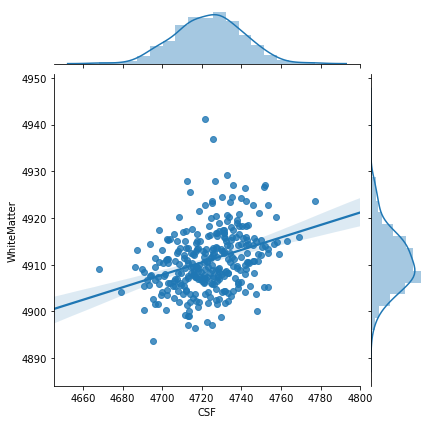

In [12]:
# Plot cerebrospinal fluid (CSF) and white matter timeseries on a scatterplot (use seaborn joint plot)
import seaborn as sns

sns.jointplot(confounds["CSF"], confounds["WhiteMatter"], kind="reg")

## 2. Load and plot COVID-19 data

Download data from [European Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide).

In [43]:
# Load some COVID-19 data
covid_path = "data/covid-ecdpc.csv"
covid = pd.read_csv(covid_path)

# Print first 5 rows of data
covid.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,02/11/2020,2,11,2020,132,5,Afghanistan,AF,AFG,38041757.0,Asia,3.766913
1,01/11/2020,1,11,2020,76,0,Afghanistan,AF,AFG,38041757.0,Asia,3.575019
2,31/10/2020,31,10,2020,157,4,Afghanistan,AF,AFG,38041757.0,Asia,3.553989
3,30/10/2020,30,10,2020,123,3,Afghanistan,AF,AFG,38041757.0,Asia,3.264833
4,29/10/2020,29,10,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,2.941505


In [44]:
# Group by country, month & day and sum cases
covid['dateRep'] = pd.to_datetime(covid['dateRep'], format='%d/%m/%Y')
covid_grouped = covid[['dateRep', 'cases', 'deaths', 'countriesAndTerritories']].groupby(['countriesAndTerritories', 'dateRep']).sum()
covid_grouped.head() 


cases  deaths
countriesAndTerritories dateRep                  
Afghanistan             2019-12-31      0       0
                        2020-01-01      0       0
                        2020-01-02      0       0
                        2020-01-03      0       0
                        2020-01-04      0       0

In [45]:
covid_grouped.loc['Poland']['cases']

dateRep
2020-03-04        1
2020-03-07        4
2020-03-08        1
2020-03-09        5
2020-03-10        6
              ...  
2020-10-29    18820
2020-10-30    20156
2020-10-31    21629
2020-11-01    21897
2020-11-02    17171
Name: cases, Length: 242, dtype: int64

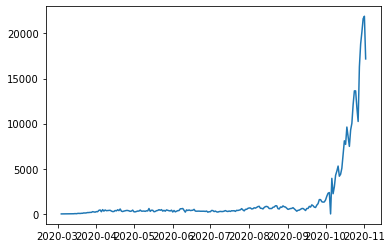

In [46]:
plt.plot(covid_grouped.loc['Poland']['cases'])

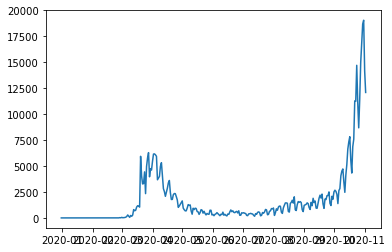

In [49]:
# Plot cases in other country
plt.plot(covid_grouped.loc['Germany']['cases'])

(array([737425., 737456., 737485., 737516., 737546., 737577., 737607.,
        737638., 737669., 737699., 737730.]),
 <a list of 11 Text major ticklabel objects>)

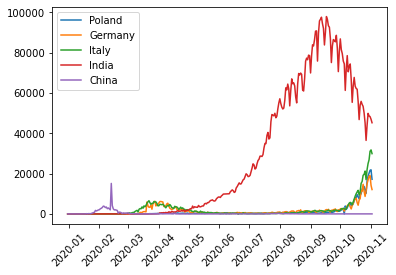

In [63]:
# Plot cases of multiple countries on a one plot (loop)

countries = ["Poland", "Germany", "Italy", "India", "China"]

for country in countries:
    cases = covid_grouped.loc[country]['cases']
    plt.plot(cases)
plt.legend(countries)
plt.xticks(rotation=45)

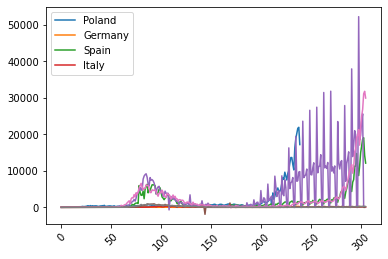

In [62]:
# Function example

def plot_cases_by_country(data, countries=[]):
    for country in countries:
        cases = data.loc[country].values[2:]
        plt.plot(cases)
    plt.legend(countries)
    plt.xticks(rotation=45)

    
plot_cases_by_country(covid_grouped, countries=["Poland", "Germany", "Spain", "Italy"])

